In [1]:
import os
import sys
import glob
from obspy.core import read, UTCDateTime
import matplotlib.pyplot as plt
from obspy.io.xseed import Parser
from obspy.geodetics import gps2dist_azimuth
from obspy.taup import TauPyModel
import numpy as np
from obspy.io.xseed import Parser
from scipy.signal import hilbert, chirp
import numpy as np

In [2]:
dataless = '../response/ISOLDE-1.dataless'
parser = Parser(dataless)

In [20]:
eventname='seismo_2012-03-25T22_37_06.000000Z'
#eventname='seismo_2012-09-05T14:42:07.800000Z'
#eventname='seismo_2012-08-31T12:47:33.380000Z'
station='TDC07'
dir='tele160'
chans=['HH1','HH2','HHZ']
chans=['BH1','BH2','BHZ']
st=read('./%s/%s/%s_%s_%s.sac'%(station,dir,eventname,station,chans[0]))
paz = parser.get_paz('1D.%s..%s'%(station,chans[0]))
st[0].simulate(paz_remove=paz,pre_filt=(0.01,0.02,1.5,2))
st.append(read('./%s/%s/%s_%s_%s.sac'%(station,dir,eventname,station,chans[1]))[0])
paz = parser.get_paz('1D.%s..%s'%(station,chans[1]))
st[1].simulate(paz_remove=paz,pre_filt=(0.01,0.02,1.5,2))
st.append(read('./%s/%s/%s_%s_%s.sac'%(station,dir,eventname,station,chans[2]))[0])
paz = parser.get_paz('1D.%s..%s'%(station,chans[2]))
st[2].simulate(paz_remove=paz,pre_filt=(0.01,0.02,1.5,2))

1D.TDC07..BHZ | 2012-03-25T22:37:06.002000Z - 2012-03-26T00:00:00.002000Z | 50.0 Hz, 248701 samples

In [391]:
  stfile= '../maps/stations.dat'
  op= open(stfile, "r")
  line=op.readline()
  stname =line.split(' ')[3]
  while(line!='' ): 
    stname =line.split(' ')[3]
    if (stname.split('\n')[0]==station):  
      try:
        ora =float(line.split(" ")[4])
      except:
        ora=np.nan
    line=op.readline()
  op.close()  

In [392]:
tr1=st[0].filter('bandpass', freqmin=0.01, freqmax=0.1, corners=4, zerophase=True)
tr2=st[1].filter('bandpass', freqmin=0.01, freqmax=0.1, corners=4, zerophase=True)
tr3=st[2].filter('bandpass', freqmin=0.01, freqmax=0.1, corners=4, zerophase=True)
n,e=rotate_ne(tr1.data,tr2.data,ora)
tr1.data=n
tr2.data=e
outdir='./s'
tr1.write('%s/%s_%s.sac.n'%(outdir,eventname,station), format='SAC')
tr2.write('%s/%s_%s.sac.e'%(outdir,eventname,station), format='SAC')
tr2.write('%s/%s_%s.sac.z'%(outdir,eventname,station), format='SAC')

In [255]:
print(st[0].stats.sac)

AttribDict({'delta': 0.02, 'depmin': -8340.0, 'depmax': 2803.0, 'scale': 1.0, 'b': 0.0, 'e': 5000.0, 'stla': -38.5811, 'stlo': -11.9621, 'stdp': -3164.0, 'evla': 10.085, 'evlo': -85.315002, 'evdp': 35000.0, 'depmen': -1984.3219, 'nzyear': 2012, 'nzjday': 249, 'nzhour': 14, 'nzmin': 42, 'nzsec': 7, 'nzmsec': 797, 'nvhdr': 6, 'npts': 250001, 'iftype': 1, 'iztype': 9, 'leven': 1, 'lpspol': 1, 'lovrok': 1, 'lcalda': 0, 'kstnm': 'TDC05', 'kcmpnm': 'BH1', 'knetwk': '1D'})


In [153]:
t=UTCDateTime('2012-09-05T23:59:59.984000Z')
t.julday

249

In [9]:
gps2dist_azimuth(st[0].stats.sac.evla, st[0].stats.sac.evlo,st[0].stats.sac.stla,st[0].stats.sac.stlo )

(5063172.9074732, 111.65217310960504, 255.30005517567977)

In [10]:
model = TauPyModel(model="iasp91")
arri=model.get_travel_times_geo(st[0].stats.sac.evdp/1000, st[0].stats.sac.evla, st[0].stats.sac.evlo,st[0].stats.sac.stla,st[0].stats.sac.stlo)
print(arri)

29 arrivals
	P phase arrival at 494.623 seconds
	pP phase arrival at 506.143 seconds
	sP phase arrival at 511.223 seconds
	PcP phase arrival at 593.086 seconds
	PP phase arrival at 601.506 seconds
	PP phase arrival at 603.565 seconds
	PP phase arrival at 606.351 seconds
	ScP phase arrival at 822.369 seconds
	PcS phase arrival at 827.210 seconds
	S phase arrival at 893.735 seconds
	SP phase arrival at 900.694 seconds
	sS phase arrival at 913.492 seconds
	PKiKP phase arrival at 1010.668 seconds
	pPKiKP phase arrival at 1023.578 seconds
	sPKiKP phase arrival at 1028.345 seconds
	ScS phase arrival at 1087.489 seconds
	SS phase arrival at 1099.483 seconds
	SS phase arrival at 1100.107 seconds
	SS phase arrival at 1106.979 seconds
	SS phase arrival at 1128.211 seconds
	SS phase arrival at 1128.364 seconds
	SKiKP phase arrival at 1219.239 seconds
	PKIKKIKP phase arrival at 1883.267 seconds
	SKIKKIKP phase arrival at 2091.806 seconds
	PKIKKIKS phase arrival at 2096.572 seconds
	SKIKKIKS phase 

In [269]:
st[0].detrend()
st[1].detrend()
st[2].detrend()
st[0].normalize()
st[1].normalize()
st[2].normalize()

1D.TDC18..BHZ | 2012-03-25T22:37:06.000000Z - 2012-03-26T00:00:00.000000Z | 50.0 Hz, 248701 samples

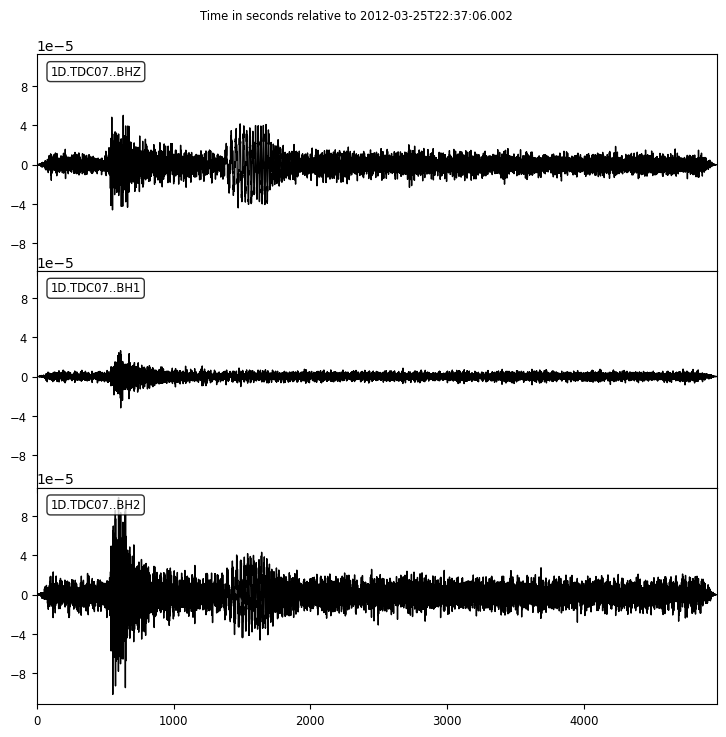

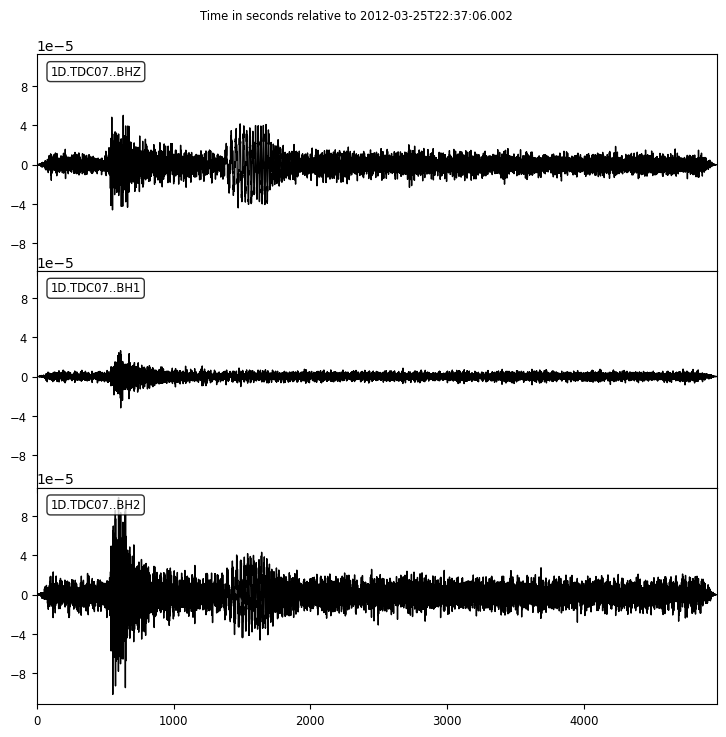

In [21]:
st.plot(type='relative')

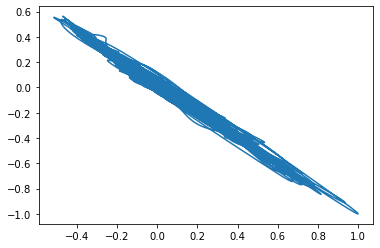

In [265]:
plt.plot(tr1,tr2)

In [170]:
def rotate_ne(bh1,bh2,ora):
    len1=len(bh1)
    len2=len(bh2)
    if len1!=len2:
        bh1=bh1[:min(len1,len2)]
        bh2=bh2[:min(len1,len2)]
    ora = np.radians(ora)
    n = bh1 * np.cos(ora) - bh2 * np.sin(ora)
    e = bh1 * np.sin(ora) + bh2 * np.cos(ora)
    return n, e

In [175]:
n,e=rotate_ne(tr1.data,tr2.data,335)
tr1.data=n
tr2.data=e

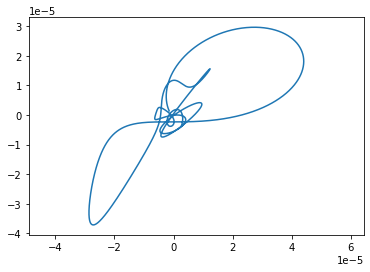

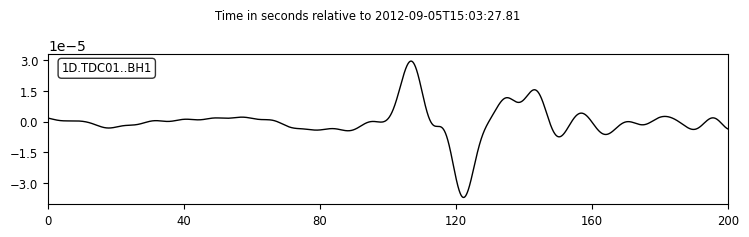

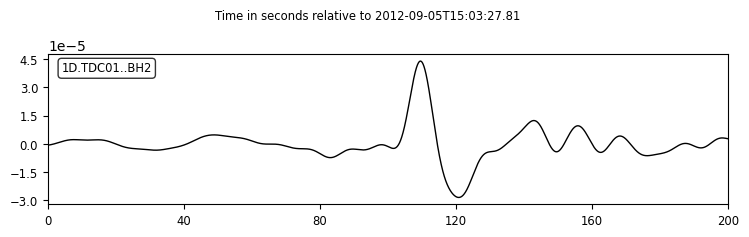

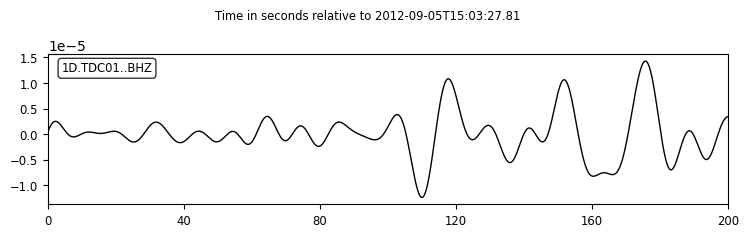

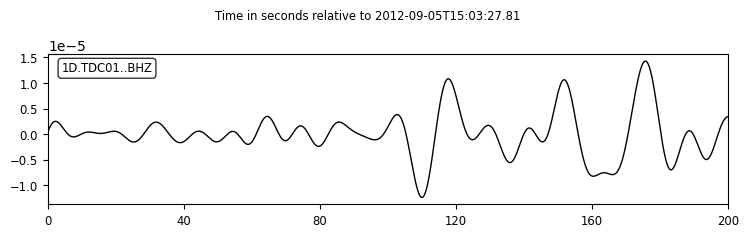

In [385]:
ar=1380
#tr1.normalize()
#tr2.normalize()
#tr3.normalize()
np1=tr1.slice(tr1.stats.starttime+ar-100,tr1.stats.starttime+ar+100)
np2=tr2.slice(tr2.stats.starttime+ar-100,tr2.stats.starttime+ar+100)
np3=tr3.slice(tr2.stats.starttime+ar-100,tr2.stats.starttime+ar+100)
plt.plot(np2[len(np2)//2::],np1[len(np1)//2::])
#plt.plot(np1,np3)
#plt.plot(np2,np3)
plt.axis('equal')
plt.show()
np1.plot(type='relative')
np2.plot(type='relative')
np3.plot(type='relative')

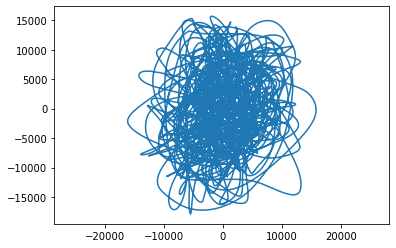

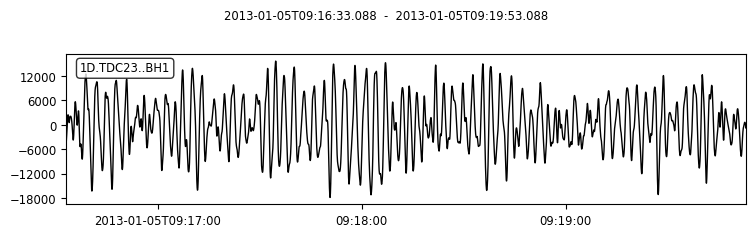

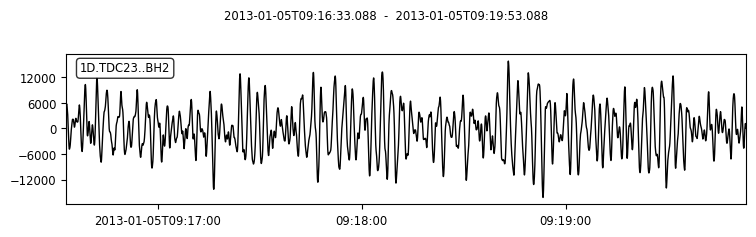

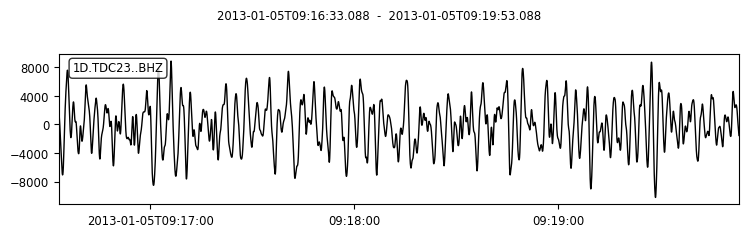

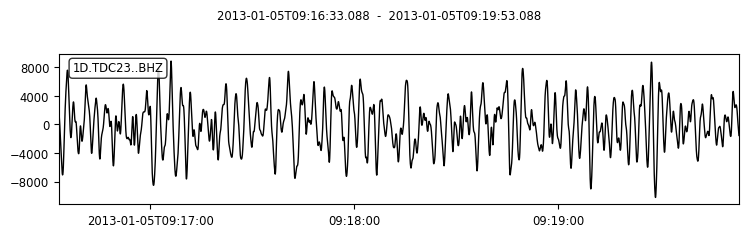

In [28]:
np1=tr1.slice(tr1.stats.starttime+arri[0].time-100,tr1.stats.starttime+arri[0].time+100)
np2=tr2.slice(tr2.stats.starttime+arri[0].time-100,tr2.stats.starttime+arri[0].time+100)
np3=tr3.slice(tr2.stats.starttime+arri[0].time-100,tr2.stats.starttime+arri[0].time+100)
plt.plot(np2,np1)
#plt.plot(np1,np3)
#plt.plot(np2,np3)
plt.axis('equal')
plt.show()
np1.plot()
np2.plot()
np3.plot()

In [189]:
tr1.stats.starttime-UTCDateTime('2012-08-14T03:18:19.210000')

-12199273.207

In [190]:
st1=st.copy()
st1.filter('bandpass', freqmin=0.05, freqmax=0.2, corners=4, zerophase=True)

3 Trace(s) in Stream:
1D.TDC09..BH1 | 2012-03-25T22:37:06.003000Z - 2012-03-25T23:59:59.983000Z | 50.0 Hz, 248700 samples
1D.TDC09..BH2 | 2012-03-25T22:37:06.003000Z - 2012-03-25T23:59:59.983000Z | 50.0 Hz, 248700 samples
1D.TDC09..BHZ | 2012-03-25T22:37:06.003000Z - 2012-03-25T23:59:59.983000Z | 50.0 Hz, 248700 samples

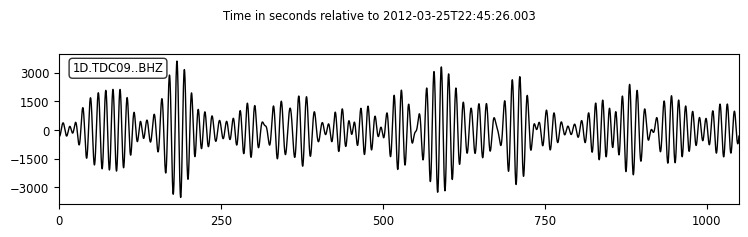

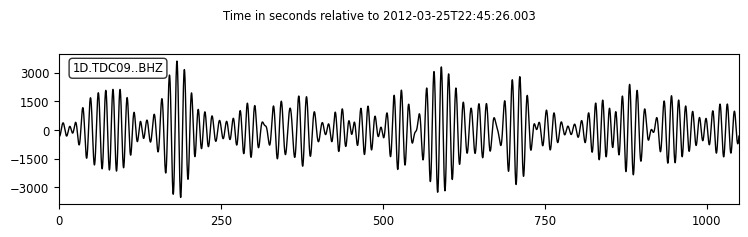

In [191]:
ts=st[0].stats.starttime
st[2].plot(starttime=ts+500,endtime=ts+1550,type='relative')

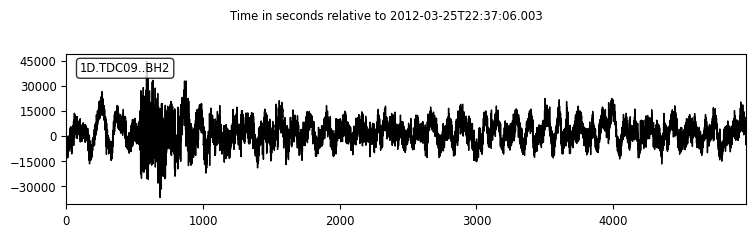

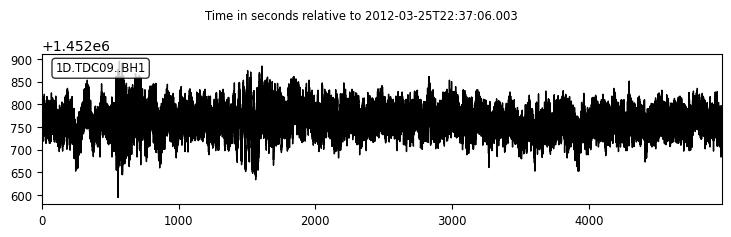

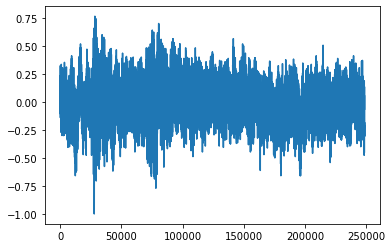

In [205]:
st[1].plot(type='relative')
st[0].plot(type='relative')
(st[0].data)
import numpy as np
st[0].data=st[0].data-np.mean(st[0].data)
st[0].data=st[0].data/max(abs(st[0].data))
st[1].data=st[1].data/max(abs(st[2].data))
st[2].data=st[2].data/max(abs(st[2].data))
plt.plot(st[0].data)

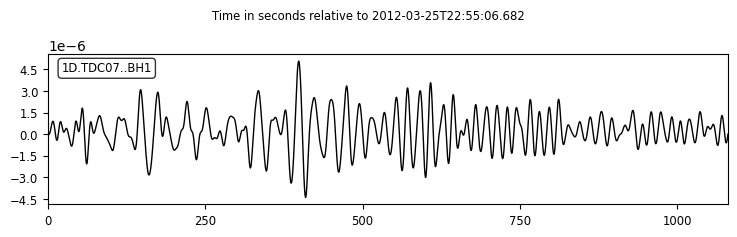

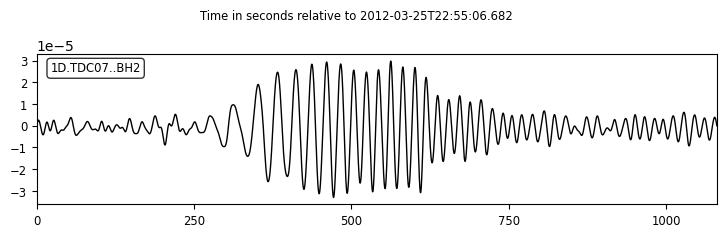

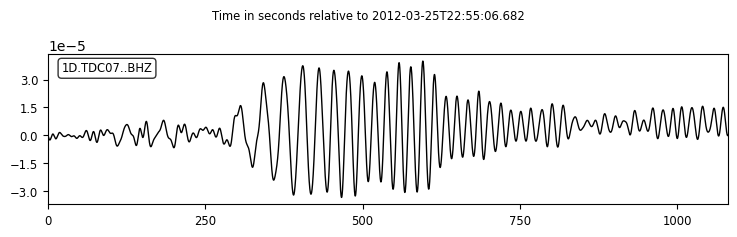

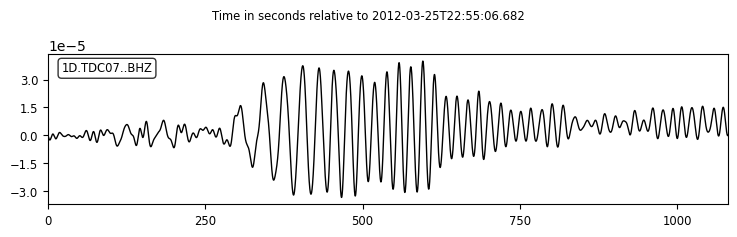

In [22]:
from scipy.signal import hilbert, chirp
import numpy as np
tr1=st[0].filter('bandpass', freqmin=0.01, freqmax=0.1, corners=4, zerophase=True)
tr2=st[1].filter('bandpass', freqmin=0.01, freqmax=0.1, corners=4, zerophase=True).filter('bandpass', freqmin=0.02, freqmax=0.2, corners=4, zerophase=True)
tr3=st[2].filter('bandpass', freqmin=0.01, freqmax=0.1, corners=4, zerophase=True)
(dis,za,baz)=gps2dist_azimuth(st[0].stats.sac.evla, st[0].stats.sac.evlo,st[0].stats.sac.stla,st[0].stats.sac.stlo)
end=dis/2500
start=dis/5000
np1=tr1.slice(tr1.stats.starttime+start,tr1.stats.starttime+end)
np2=tr2.slice(tr2.stats.starttime+start,tr2.stats.starttime+end)
np3=tr3.slice(tr2.stats.starttime+start,tr2.stats.starttime+end)

np1.detrend()
np2.detrend()
np3.detrend()
'''
np1.normalize()
np2.normalize()
np3.normalize()
'''
np1.plot(type='relative')
np2.plot(type='relative')
np3.plot(type='relative')

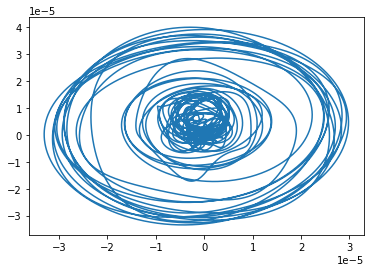

In [26]:
plt.plot(np2,np3)
plt.show()


In [2]:
def corr(l1,l2):
    l=l1*l2
    s=np.sum(l)
    return s

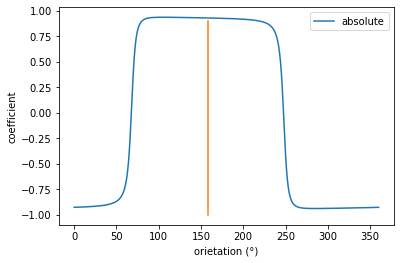

In [23]:
from scipy import signal
evlos=[]
crz=np.zeros(361)
crz2=np.zeros(361)
raz=(baz-180+360)%360
for j in range(0,361):
    i=(raz-j+360)%360
    rad=np1.data*np.cos(i/180*np.pi)+np2.data*np.sin(i/180*np.pi)
    tang=np1.data*np.cos((i+90)/180*np.pi)+np2.data*np.sin((i+90)/180*np.pi)
    h= hilbert(rad)
    hr=np.imag(h)
    evlos.append(np.abs(h))    
    corrr = corr(hr, hr,)
    corzr = corr(hr, np3.data)
    corzz = corr(np3.data,np3.data)
    crz[j]=corzr/(corzz*corrr)**(0.5)
    crz2[j]=corzr/corzz
plt.plot(crz,label='absolute')
#plt.plot(crz2,label='normalized')
plt.plot(np.argmax(crz2)*np.ones(20),np.arange(-1,1,0.1))
plt.xlabel("orietation (°)") 
plt.ylabel("coefficient")
plt.legend()
plt.show()

No handles with labels found to put in legend.


NameError: name 'x' is not defined

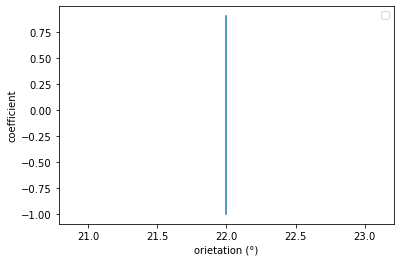

In [8]:
#plt.plot(crz2,label='normalized')
plt.plot(np.argmax(crz2)*np.ones(20),np.arange(-1,1,0.1))
plt.xlabel("orietation (°)") 
plt.ylabel("coefficient")
plt.legend()
plt.pcolormesh(x,y,np.array(evlos))
plt.clim(0.3,0.9)
#plt.colorbar(orientation='vertical')
plt.ylabel("angle (°)") 
plt.xlabel("times (s)")
plt.show()

In [15]:
y,x=np.array(evlos).shape
x=np1.stats.delta*np.arange(0,x,1)
y=np.arange(0,y,1)

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12,10),gridspec_kw={'width_ratios': [3, 1],
                                                         'height_ratios': [1,1]})


cmap = plt.get_cmap('Greys')
ax[0,0].plot(np1.times("relative"), np1.data, "k-")
ax[0,0].plot(np1.times("relative"), np2.data-2, "k-")
ax[0,0].plot(np1.times("relative"), np3.data-4, "k-")
ax[0,0].set_xlim(0,1000)
                                            
ax[0,0].spines['right'].set_visible(False)
ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['left'].set_visible(False)
ax[-1,0].pcolormesh(x,y,np.array(evlos),cmap=cmap)
ax[-1,0].plot(np.arange(0,1500,100),np.argmax(crz)*np.ones(len(np.arange(0,1500,100))),'b')
ax[-1,0].set_ylabel("angle (°)") 
ax[-1,0].set_xlabel("times (s)")
ax[-1,0].set_xlim(0,1000)
ax[-1,1].plot(crz,np.arange(0,361,1),'black',label='absolute')
ax[-1,1].plot([min(crz),max(crz)],np.argmax(crz)*np.ones(2),'b')
#plt.plot(crz2,label='normalized')

ax[-1,1].set_ylabel("orietation (°)") 
ax[-1,1].set_xlabel("coefficient")
#plt.savefig('ex.ps')

/home/gphs1/hzhang/anaconda3/envs/obspy/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


In [1]:
plt.pcolormesh(x,y,np.array(evlos),cmap=cmap)
plt.savefig('ex.ps')

NameError: name 'plt' is not defined

/home/gphs1/hzhang/anaconda3/envs/obspy/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  after removing the cwd from sys.path.


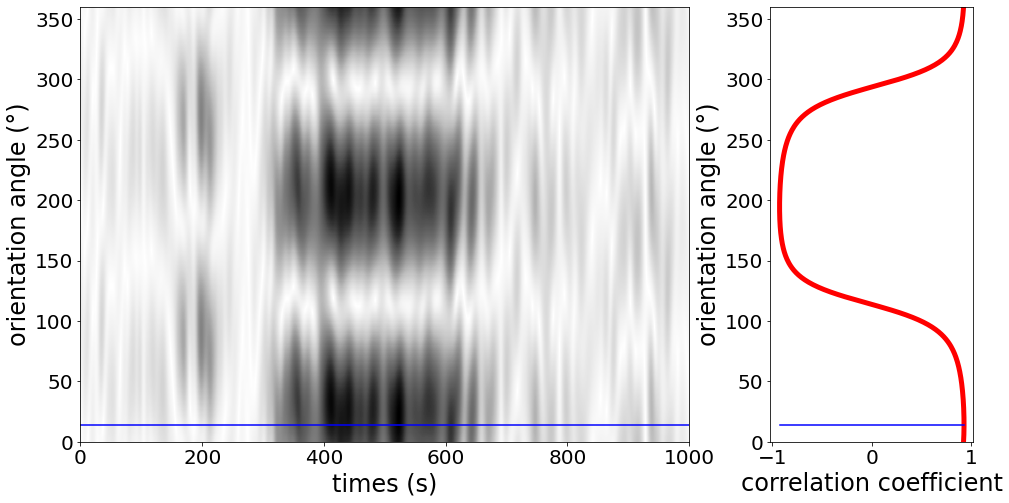

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(16,8),gridspec_kw={'width_ratios': [3, 1]})

cmap = plt.get_cmap('Greys')
ax[0].pcolormesh(x,y,np.array(evlos),cmap=cmap)
ax[0].plot(np.arange(0,1500,100),np.argmax(crz)*np.ones(len(np.arange(0,1500,100))),'b')
ax[0].set_ylabel("orientation angle (°)",size=24) 
ax[0].set_xlabel("times (s)",size=24)
ax[0].set_xlim(0,1000)
ax[1].plot(crz,np.arange(0,361,1),'red',linewidth=5,label='absolute')
ax[1].plot([min(crz),max(crz)],np.argmax(crz)*np.ones(2),'b')
ax[1].set_ylabel("orientation angle (°)",size=24) 
ax[1].set_xlabel("correlation coefficient",size=24)
#plt.plot(crz2,label='normalized')
ax[1].set_ylim(0,360)
ax[0].xaxis.set_tick_params(labelsize=20)
ax[0].yaxis.set_tick_params(labelsize=20)
ax[1].xaxis.set_tick_params(labelsize=20)
ax[1].yaxis.set_tick_params(labelsize=20)
plt.savefig('orientation2.jpg')

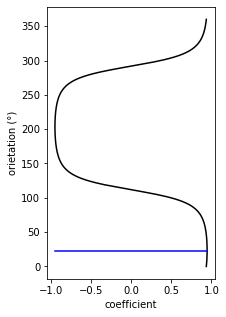

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(3,5))

ax.plot(crz,np.arange(0,361,1),'black',label='absolute')
ax.plot([min(crz),max(crz)],np.argmax(crz)*np.ones(2),'b')
#plt.plot(crz2,label='normalized')

ax.set_ylabel("orietation (°)") 
ax.set_xlabel("coefficient")
ax[1].set_ylim(-1.5,1.5)
plt.savefig('orientation3.jpg')

In [22]:
np.argmax(crz)

23

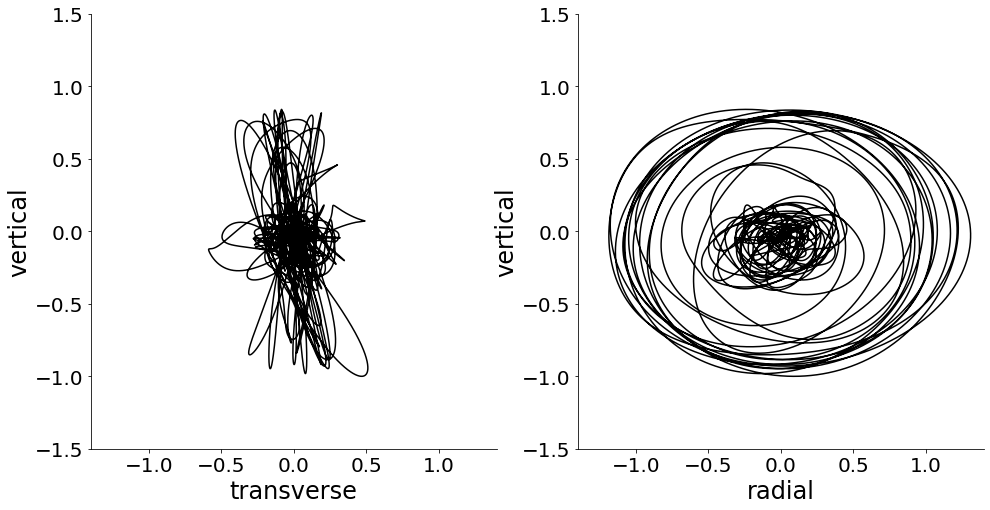

In [26]:
i=(raz-23+360)%360
rad=np1.data*np.cos(i/180*np.pi)+np2.data*np.sin(i/180*np.pi)
tang=np1.data*np.cos((i+90)/180*np.pi)+np2.data*np.sin((i+90)/180*np.pi)
fig, ax = plt.subplots(1, 2, figsize=(16,8))
ax[0].plot(tang,np3,'black')
ax[1].plot(rad,np3,'black')
ax[0].axis('equal')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

ax[1].axis('equal')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].set_ylabel("vertical",size=24)
ax[0].set_xlabel("transverse",size=24)
ax[1].set_ylabel("vertical",size=24) 
ax[1].set_xlabel("radial",size=24)
ax[0].xaxis.set_tick_params(labelsize=20)
ax[0].yaxis.set_tick_params(labelsize=20)
ax[1].xaxis.set_tick_params(labelsize=20)
ax[1].yaxis.set_tick_params(labelsize=20)
ax[0].set_xlim(-1.5,1.5)
ax[0].set_ylim(-1.5,1.5)
ax[1].set_xlim(-1.5,1.5)
ax[1].set_ylim(-1.5,1.5)
plt.savefig('orientation4.jpg')

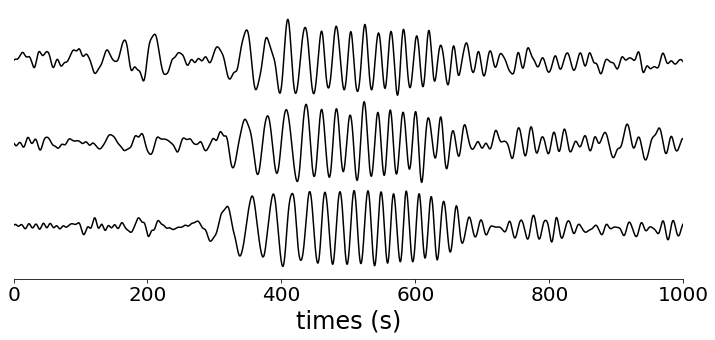

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(12,5))

ax.plot(np1.times("relative"), np1.data, "k-")
ax.plot(np1.times("relative"), np2.data-2, "k-")
ax.plot(np1.times("relative"), np3.data-4, "k-")

ax.set_xlim(0,1000)
ax.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel("times (s)",size=24)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.savefig('orientation1',dpi=200,format='jpg',bbox_inches='tight')

In [237]:
maxindex=np.argmax(crz)
maxindex

349

In [885]:
crz[maxindex]

0.56178813104148262

In [150]:
len(corzr)

79188

In [72]:
z1= read('./TDC06-TDC02/BH1-BHZ/stack.sac')
z2= read('./TDC06-TDC02/BH2-BHZ/stack.sac')
zz= read('./TDC06-TDC02/BHZ-BHZ/stack.sac')

In [73]:
delta=z1[0].stats.delta

In [71]:
z1= read('./NIG01-NIG01/HHN-HHZ/stack.sac')
z2= read('./NIG01-NIG01/HHE-HHZ/stack.sac')
zz= read('./NIG01-NIG01/HHZ-HHZ/stack.sac')

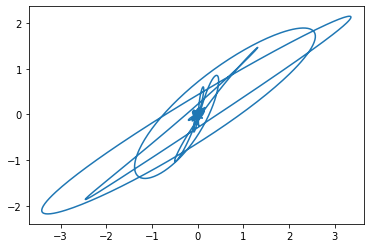

In [91]:
plt.plot(np2,np1)
plt.axis('equal')

plt.show()

In [108]:
l=len(np1)

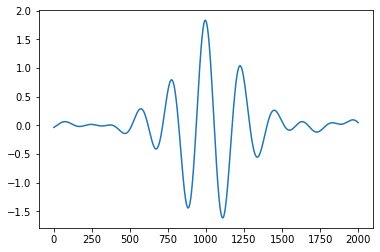

In [111]:
plt.plot(np1[int(l/2)-1000:int(l/2)+1000])

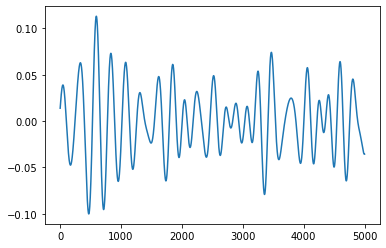

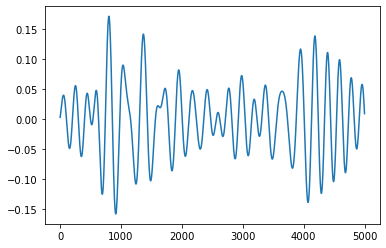

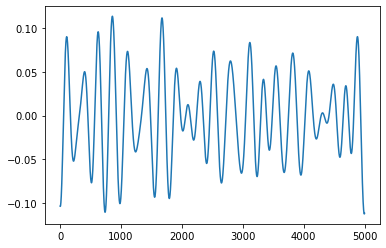

In [60]:
tr1=z1[0].filter('bandpass', freqmin=0.1, freqmax=0.3, corners=4, zerophase=True)
tr2=z2[0].filter('bandpass', freqmin=0.1, freqmax=0.3, corners=4, zerophase=True)
tr3=zz[0].filter('bandpass', freqmin=0.1, freqmax=0.3, corners=4, zerophase=True)

np1=tr1.data[::1]
np2=tr2.data[::1]
np3=tr3.data[::1]
l=len(np1)
start=50
end=50
np1=np1[int(l/2)-int(start/delta):int(l/2)+int(end/delta)]
np2=np2[int(l/2)-int(start/delta):int(l/2)+int(end/delta)]
np3=np3[int(l/2)-int(start/delta):int(l/2)+int(end/delta)]
plt.plot(np1)
plt.show()
plt.plot(np2)
plt.show()
plt.plot(np3)
plt.show()

In [53]:
stat=['TRIS','NIG01']
if stat[1]=='NIG01'or stat[1]=='TDC04' or stat[1]=='TDC11':
    chan='HHZ'
else:
    chan='BHZ'
z1= read('./%s-%s/BHN-%s/stack.sac'%(stat[0],stat[1],chan))
z2= read('./%s-%s/BHE-%s/stack.sac'%(stat[0],stat[1],chan))
zz= read('./%s-%s/BHZ-%s/stack.sac'%(stat[0],stat[1],chan))
delta=z1[0].stats.delta

stfile= '../maps/stations.dat'
op= open(stfile, "r")
line=op.readline()
stname =line.split(' ')[3]
while(line!='' ): 
    stname =line.split(' ')[3]
    if (stname.split('\n')[0]==stat[0]):  
      stlon =float(line.split(" ")[0])
      stlat =float(line.split(" ")[1])
      stdp =float(line.split(" ")[2])
      print (stlon,stlat,stname)
    if (stname.split('\n')[0]==stat[1]):  
      evlon =float(line.split(" ")[0])
      evlat =float(line.split(" ")[1])
      
      evdp =float(line.split(" ")[2])
      print (evlon,evlat,stname)
    line=op.readline()
op.close() 


-12.4755 -37.4177 NIG01
-12.3152 -37.0681 TRIS


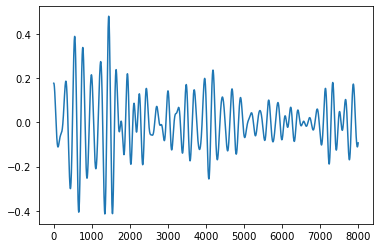

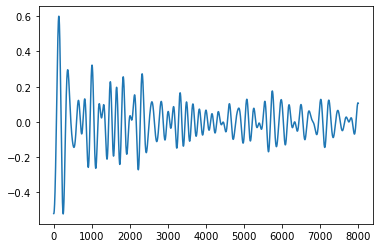

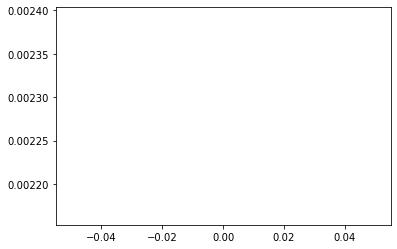

In [55]:
from scipy import signal

#(dis,za,baz)=gps2dist_azimuth( -35.9246, -9.6875,-36.6687,-9.9938 )
#(dis,za,baz)=gps2dist_azimuth(-36.6687,-9.9938, -36.9082 ,-11.2062 )

#(dis,za,baz)=gps2dist_azimuth(-36.6687,-9.9938,-35.9246, -9.6875 )
(dis,za,baz)=gps2dist_azimuth(evlat,evlon,stlat,stlon )
start=dis/5000
end=dis/500



tr1=z1[0].filter('bandpass', freqmin=0.1, freqmax=0.3, corners=4, zerophase=True)
tr2=z2[0].filter('bandpass', freqmin=0.1, freqmax=0.3, corners=4, zerophase=True)
tr3=zz[0].filter('bandpass', freqmin=0.1, freqmax=0.3, corners=4, zerophase=True)

np1=tr1.data[::-1]+tr1.data[::1]
np2=tr2.data[::-1]+tr2.data[::1]
np3=tr3.data[::-1]+tr3.data[::1]
'''
np1=tr1.data[::-1]+tr1.data[::-1]
np2=tr2.data[::-1]+tr2.data[::-1]
np3=tr3.data[::-1]+tr3.data[::-1]
'''
'''
l=len(np1)
np1=np1[int(l/2)+int(start/delta):int(l/2)+int(end/delta)]
np2=np2[int(l/2)+int(start/delta):int(l/2)+int(end/delta)]
np3=np3[int(l/2)+int(start/delta):int(l/2)+int(end/delta)]
'''
l=len(np1)
np1=np1[int(l/2):int(l/2)+int(200/delta)]
np2=np2[int(l/2):int(l/2)+int(200/delta)]
np3=np3[int(l/2):int(l/2)+int(200/delta)]

plt.plot(np1)
plt.show()
plt.plot(np2)
plt.show()
plt.plot(np3)
plt.show()

In [96]:
tr1.times("relative")

array([0.0000e+00, 2.0000e-02, 4.0000e-02, ..., 7.9996e+02, 7.9998e+02,
       8.0000e+02])

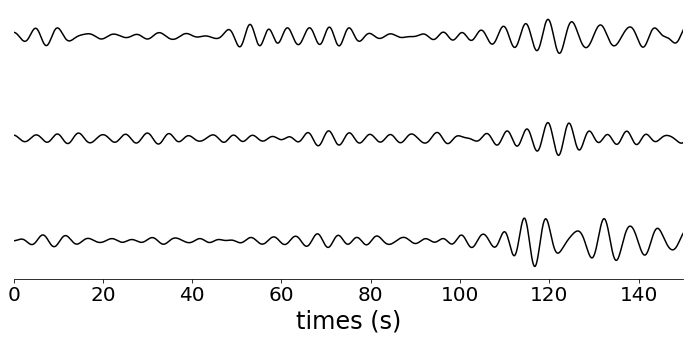

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(12,5))
l=len(np1)
ax.plot(tr1.times("relative")[:l], np1, "k-")
ax.plot(tr1.times("relative")[:l], np2-2, "k-")
ax.plot(tr1.times("relative")[:l], np3-4, "k-")

ax.set_xlim(0,150)
ax.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel("times (s)",size=24)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.savefig('orientationa',dpi=300,format='tif',bbox_inches='tight')

In [163]:
dis/800

121.22334175820484

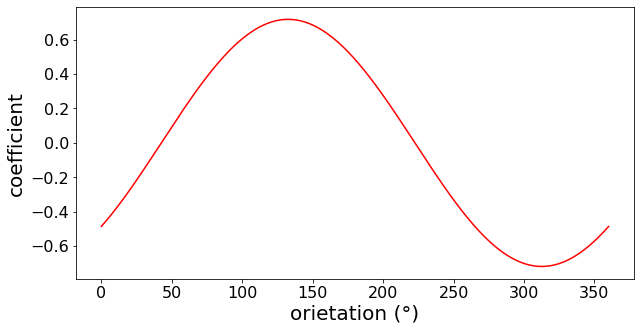

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

ax.plot(np.arange(0,361,1),crz2,'red',label='absolute')
#ax.plot([min(crz),max(crz)],np.argmax(crz2)*np.ones(2),'b')
#plt.plot(crz2,label='normalized')

ax.set_xlabel("orietation (°)",size=20) 
ax.set_ylabel("coefficient",size=20)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
plt.savefig('orientationb',dpi=300,format='tif',bbox_inches='tight')
#ax.set_ylim(-1.5,1.5)

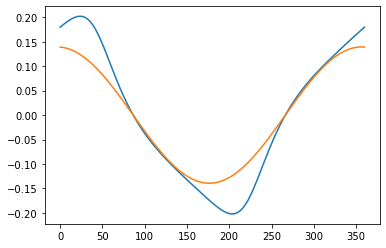

In [51]:
evlos=[]
crz=np.zeros(361)
crz2=np.zeros(361)
raz=(baz-180+360)%360
for j in range(0,361):
    i=(raz-j+360)%360
    rad=np1*np.cos(i/180*np.pi)+np2*np.sin(i/180*np.pi)
    h= hilbert(rad)
    hr=np.imag(h)
    evlos.append(np.abs(h))    
    corrr = corr(hr, hr)
    corzr = corr(hr, np3)
    corzz = corr(np3,np3)
    crz[j]=corzr/(corzz*corrr)**(0.5)
    crz2[j]=corzr/corzz
plt.plot(crz)
plt.plot(crz2)
plt.show()

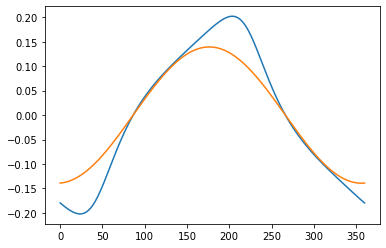

In [52]:
evlos=[]
crz=np.zeros(361)
crz2=np.zeros(361)
raz=(baz-180+360)%360
for j in range(0,361):
    i=(raz-j+360)%360
    rad=np1*np.cos(i/180*np.pi)+np2*np.sin(i/180*np.pi)
    h= hilbert(np3)
    hz=np.imag(h)
    evlos.append(np.abs(h))    
    corrr = corr(rad, rad)
    corzr = corr(rad, hz)
    corzz = corr(hz,hz)
    crz[j]=corzr/(corzz*corrr)**(0.5)
    crz2[j]=corzr/corzz
plt.plot(crz)
plt.plot(crz2)
plt.show()

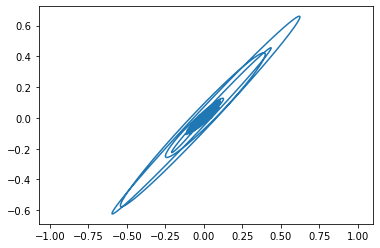

In [204]:
plt.plot(rad,np3)
plt.axis('equal')
plt.show()

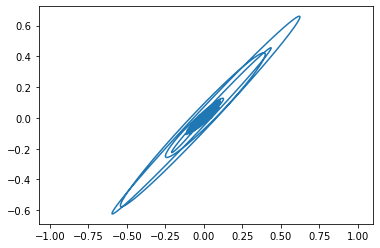

In [205]:
plt.plot(rad,np3)
plt.axis('equal')
plt.show()

In [3]:
def calc(stat):
    if stat[1]=='NIG01'or stat[1]=='TDC04' or stat[1]=='TDC11':
        chan='HHZ'
    else:
        chan='BHZ'
    z1= read('./%s-%s/BH1-%s/stack.sac'%(stat[0],stat[1],chan))
    z2= read('./%s-%s/BH2-%s/stack.sac'%(stat[0],stat[1],chan))
    zz= read('./%s-%s/BHZ-%s/stack.sac'%(stat[0],stat[1],chan))
    delta=z1[0].stats.delta

    stfile= '../maps/stations.dat'
    op= open(stfile, "r")
    line=op.readline()
    stname =line.split(' ')[3]
    while(line!='' ): 
        stname =line.split(' ')[3]
        if (stname.split('\n')[0]==stat[0]):  
          stlon =float(line.split(" ")[0])
          stlat =float(line.split(" ")[1])
          stdp =float(line.split(" ")[2])
          print (stlon,stlat,stname)
        if (stname.split('\n')[0]==stat[1]):  
          evlon =float(line.split(" ")[0])
          evlat =float(line.split(" ")[1])

          evdp =float(line.split(" ")[2])
          print (evlon,evlat,stname)
        line=op.readline()
    op.close()
    
    (dis,za,baz)=gps2dist_azimuth(evlat,evlon,stlat,stlon )
    start=dis/2000
    end=dis/800

    tr1=z1[0].filter('bandpass', freqmin=0.1, freqmax=0.3, corners=4, zerophase=True)
    tr2=z2[0].filter('bandpass', freqmin=0.1, freqmax=0.3, corners=4, zerophase=True)
    tr3=zz[0].filter('bandpass', freqmin=0.1, freqmax=0.3, corners=4, zerophase=True)

    np1=tr1.data[::-1]+tr1.data[::1]
    np2=tr2.data[::-1]+tr2.data[::1]
    np3=tr3.data[::-1]+tr3.data[::1]
    '''
    np1=tr1.data[::-1]+tr1.data[::-1]
    np2=tr2.data[::-1]+tr2.data[::-1]
    np3=tr3.data[::-1]+tr3.data[::-1]
    '''
    l=len(np1)
    np1=np1[int(l/2)+int(start/delta):int(l/2)+int(end/delta)]
    np2=np2[int(l/2)+int(start/delta):int(l/2)+int(end/delta)]
    np3=np3[int(l/2)+int(start/delta):int(l/2)+int(end/delta)]
    
    evlos=[]
    crz=np.zeros(361)
    crz2=np.zeros(361)
    raz=(baz-180+360)%360
    for j in range(0,361):
        i=(raz-j+360)%360
        rad=np1*np.cos(i/180*np.pi)+np2*np.sin(i/180*np.pi)
        h= hilbert(np3)
        hz=np.imag(h)
        evlos.append(np.abs(h))    
        corrr = corr(rad, rad)
        corzr = corr(rad, hz)
        corzz = corr(hz,hz)
        crz[j]=corzr/(corzz*corrr)**(0.5)
        crz2[j]=corzr/corzz
    ind=np.argmax(crz2)
    c=crz2[ind]
    return ind,c

In [119]:
stats=[['TDC06','TDC02'],['TDC06','TDC03'],['TDC06','TDC04'],['TDC06','TDC05'],['TDC06','TDC07'],['TDC06','TDC12'],['TDC06','TDC14'],['TDC06','NIG01']
    ,['TDC06','TDC01'],['TDC06','TDC15'],['TDC06','TDC11'],['TDC06','TDC18'],['TDC06','TDC16'],['TDC06','TDC10']
      ,['TDC06','TDC19'],['TDC06','TDC20'],['TDC06','TDC22'],['TDC06','TDC23'],['TDC06','TDC26'],['TDC06','TDC09']]
results=[]
for stat in stats:
    ind,c=calc(stat) 
    results.append([ind,c])
    

-9.9938 -36.6687 TDC02
-11.3744 -37.7472 TDC06
-10.309 -37.5922 TDC03
-11.3744 -37.7472 TDC06
-10.7821 -38.3635 TDC04
-11.3744 -37.7472 TDC06
-11.9621 -38.5811 TDC05
-11.3744 -37.7472 TDC06
-11.3744 -37.7472 TDC06
-11.2062 -36.9082 TDC07
-11.3744 -37.7472 TDC06
-11.902 -37.3607 TDC12
-11.3744 -37.7472 TDC06
-12.4518 -37.9298 TDC14
-11.3744 -37.7472 TDC06
-12.4755 -37.4177 NIG01
-9.6875 -35.9246 TDC01
-11.3744 -37.7472 TDC06
-11.3744 -37.7472 TDC06
-13.0818 -38.7528 TDC15
-11.3744 -37.7472 TDC06
-12.1223 -36.878 TDC11
-11.3744 -37.7472 TDC06
-12.9129 -37.5974 TDC18
-11.3744 -37.7472 TDC06
-14.0116 -38.9018 TDC16
-11.3744 -37.7472 TDC06
-11.9398 -36.2762 TDC10
-11.3744 -37.7472 TDC06
-13.4182 -37.2571 TDC19
-11.3744 -37.7472 TDC06
-14.7217 -38.2744 TDC20
-11.3744 -37.7472 TDC06
-14.5486 -37.4812 TDC22
-11.3744 -37.7472 TDC06
-14.2836 -36.6469 TDC23
-11.3744 -37.7472 TDC06
-12.6794 -36.9952 TDC26
-11.3744 -37.7472 TDC06
-11.4946 -35.6429 TDC09


In [69]:
results[:,0]

array([185., 184., 176., 194., 196., 174., 180., 187.])

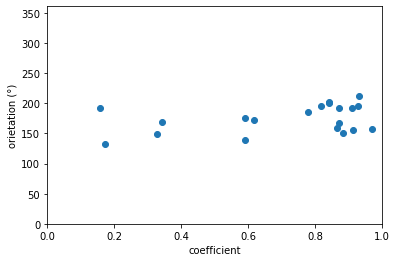

In [117]:
results=np.array(results)
plt.scatter(results[:,1],results[:,0])
#plt.savefig('./%s_or.png'%station)
#plt.plot(np.arange(0,1.1,0.1),mean*np.ones(11),'black')
plt.ylabel("orietation (°)") 
plt.xlabel("coefficient")
plt.xlim(0,1)
plt.ylim(0,361)
plt.savefig('orientationc',dpi=300,format='tif',bbox_inches='tight')


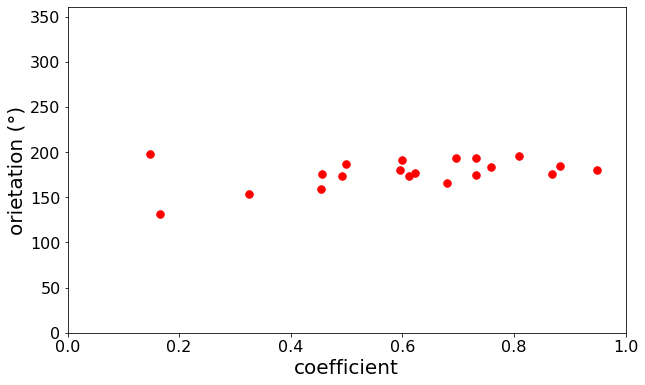

In [160]:
results=np.array(results)
fig, ax = plt.subplots(1, 1, figsize=(10,6))
plt.plot(results[:,1],results[:,0],'r.',markersize=15)
#plt.savefig('./%s_or.png'%station)
#plt.plot(np.arange(0,1.1,0.1),mean*np.ones(11),'black')
plt.ylabel("orietation (°)",size=20) 
plt.xlabel("coefficient",size=20)
plt.xlim(0,1)
plt.ylim(0,361)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
plt.savefig('orientationc',dpi=300,format='tif',bbox_inches='tight')

In [164]:
np.argmax(crz2)

180

In [774]:
gps2dist_azimuth(-37.4177,-12.4755,-37.3607,-11.9020)

(51179.23014834996, 83.07383976249821, 262.7255937160963)

In [808]:
baz

177.90053346848921